### Sentiment analysis of Twitter data: The potential of AI in predicting depression using social media.


We use a dataset of 20,000 labeled English tweets collected via the Twitter API, with labels indicating whether the users who posted them are depressed or non-depressed. The tweets are preprocessed using standard NLP techniques such as tokenization, removing stop words, stemming or lemmatization, and converting the text into a numerical feature representation using bag-of-words or TF-IDF. 
We employ the TextBlob library and various classifying algorithms, including Decision Tree, Random Forest Classifier, KNN Classifier, and Naïve Bayes, to analyze the preprocessed data and classify the tweets into depressed and non-depressed categories.



### Exploratory Data Analysis: Data Pre-processing


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("F:\\Sem 3\\Introduction to Natural language Processing\\Assignment 2\\Mental-Health-Twitter.csv")
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [49]:
df.shape

(20000, 11)

In [50]:
df.isnull().sum() # check for missing values

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [4]:
# keep only the required columns
df = df[['post_text']]
df.head()

,post_text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...


In [5]:
df.describe()

,post_text
count,20000
unique,19488
top,Oh crap! It's a trap! Aleph took damage.
freq,15


In [6]:
df.shape

(20000, 1)

### Text Cleaning: 
Remove punctuation, numbers, stop words and convert tweets to lower case

In [7]:
# Change all characters in tweets to lower case
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove numbers from tweets
df["post_text"] = df["post_text"].str.replace("\d","")

# Remove punctuation from tweets
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

Import TextBlob and NLTK (Natural Language Toolkit) which are used for natural language processing (NLP) tasks.

**TextBlob** provides a more user-friendly API for common NLP tasks such as **sentiment analysis, part-of-speech tagging, and text classification**.

**NLTK** provides a wide range of functionalities for tasks such as tokenization, stemming, lemmatization, parsing, and more. It also includes a vast array of corpora and datasets for language modeling and machine learning.

In [9]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [10]:
# Remove stop words
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jalpa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Lemmatization and Word tokenization

In [12]:
from textblob import TextBlob

In [13]:
"!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/"

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
# Lemmatization (to group similar words together)
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jalpa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jalpa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
# tokenize each word
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jalpa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
df.head()

,post_text,tokens
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi..."
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ..."
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]"
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts..."
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,..."


# Sentiment Analysis
We will employ TextBlob, a Python library, to conduct sentiment analysis on our preprocessed text data. The objective is to classify each tweet as either exhibiting signs of depression or not, based on its sentiment score. Sentiment analysis is an NLP technique that entails analyzing the emotional tone of text, with the goal of automatically classifying it as positive, negative, or neutral, depending on the words and phrases used. TextBlob utilizes a machine learning algorithm to analyze text and assign a sentiment score ranging from -1 to +1, where a score of -1 indicates a very negative sentiment, +1 indicates a very positive sentiment, and 0 indicates a neutral sentiment. By analyzing tweets using TextBlob's sentiment analysis, we can categorize them as depressed or non-depressed based on their sentiment scores. For example, a tweet with a sentiment score of -0.8 might be classified as depressed, while a tweet with a sentiment score of +0.5 may be classified as non-depressed.

In [17]:
# Applying sentiment to entire dataset

blob_emptylist = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

In [18]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df2 = pd.DataFrame(blob_emptylist)
df2.head()

,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.400000,0.700000
3,1.000000,0.875000
4,-0.045833,0.370833


In [19]:
# Combine both df and df2
df3 = pd.concat([df.reset_index(drop=True), df2], axis=1)
df3.head()

,post_text,tokens,polarity,subjectivity
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi...",0.100000,1.000000
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ...",-0.093750,0.750000
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]",-0.400000,0.700000
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000,0.875000
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,...",-0.045833,0.370833


In [20]:
# we only care about Positive or Negative hence drop subjectivity and only look at polarity
df4 = df3[['post_text','tokens','polarity']]
df4.head(6)

,post_text,tokens,polarity
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi...",0.100000
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ...",-0.093750
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]",-0.400000
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,...",-0.045833
5,making packing lists new hobby... #movinghouse,"[making, packing, lists, new, hobby, movinghouse]",0.136364


In [21]:
# Sentiment value
df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "Positive", "Negative")
df4.head()

,post_text,tokens,polarity,Sentiment
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi...",0.100000,Positive
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ...",-0.093750,Negative
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]",-0.400000,Negative
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000,Positive
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,...",-0.045833,Negative


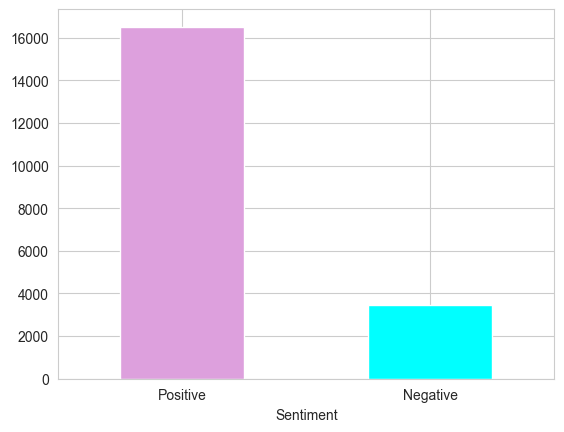

In [22]:
result = df4["Sentiment"].value_counts()

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [23]:
df4.groupby("Sentiment").count()

,post_text,tokens,polarity
Sentiment,,,
Negative,3480,3480,3480
Positive,16520,16520,16520


In [24]:
df4.groupby("polarity").max().head(5) 
# returns the tweets with maximum polarity i.e. most negative tweets

,post_text,tokens,Sentiment
polarity,,,
-1.000000,"wrong! said nsa &amp; cia, others convinces us...","[wrong, said, nsa, amp, cia, others, convinces...",Negative
-1.000000,@thebotanophile @jasonmillerindc @realdonaldtr...,"[thebotanophile, jasonmillerindc, realdonaldtr...",Negative
-0.976563,@the_newright everyone knows false news fromtn...,"[the_newright, everyone, knows, false, news, f...",Negative
-0.976562,exxonmobil helped defeat russia sanctions bill...,"[politicususa, joe, amp, mika, trump, putin, c...",Negative
-0.953674,really wan informed watch @cbsthismorning !!!!...,"[really, wan, informed, watch, cbsthismorning,...",Negative


## Visualize the results

Text(0.5, 1.0, 'Polarity Distribution')

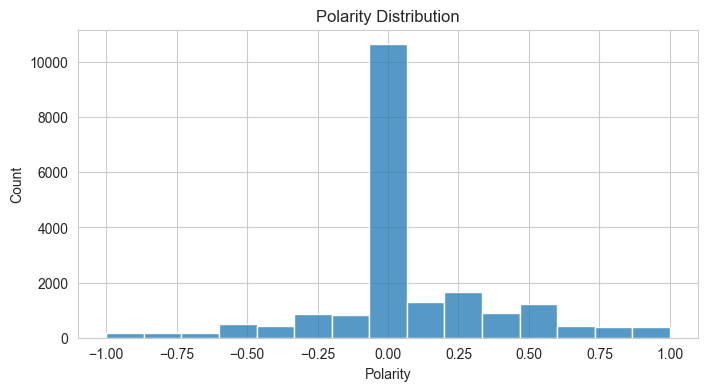

In [25]:
#Visualize distribution of polarity
plt.figure(figsize=(8,4))
sns.histplot(df4['polarity'], bins=15, kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')

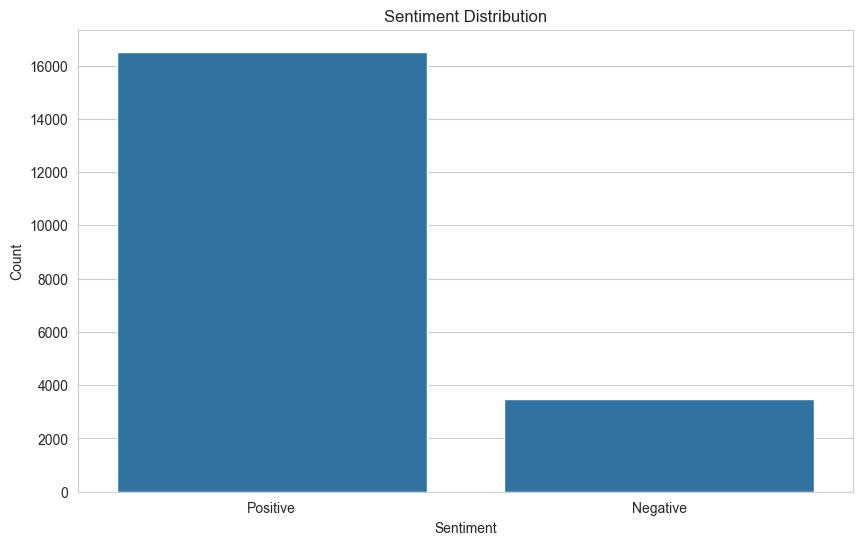

In [26]:
# Visualize distribution of sentiment
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=df4,order=df4['Sentiment'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
# split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(df4['post_text'], df4['Sentiment'], test_size=0.2, random_state=42)

In [29]:
# Convert the text data into numerical features using a CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [30]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.92725


In [31]:
# Create a classification report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.77      0.85      0.80       705
    Positive       0.97      0.94      0.96      3295

    accuracy                           0.93      4000
   macro avg       0.87      0.90      0.88      4000
weighted avg       0.93      0.93      0.93      4000



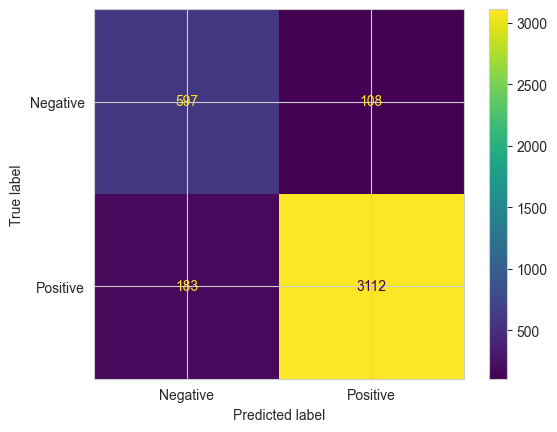

In [32]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot() 

In [33]:
# Check to see if the decision tree is overfitting or underfitting
print('The training score is',round(clf.score(X_train, y_train)*100,2),'%')
print('The testing score is',round(clf.score(X_test, y_test)*100,2),'%')

The training score is 100.0 %
The testing score is 92.73 %


In [34]:
# check to see if data is balanced
df4['Sentiment'].value_counts()

Sentiment
Positive    16520
Negative     3480
Name: count, dtype: int64

# Random Forest Classifier

In [35]:
# create a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Evaluate the classifier on the testing set
accuracy = rfc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.91775


In [37]:
# Get the accuracy score of the model
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(rfc.predict(X_test), y_test)*100,2),'%')

The accuracy of the Random Forest Classifier is 91.77 %


In [38]:
# Create a classification report
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76       705
    Positive       0.95      0.95      0.95      3295

    accuracy                           0.92      4000
   macro avg       0.86      0.85      0.86      4000
weighted avg       0.92      0.92      0.92      4000



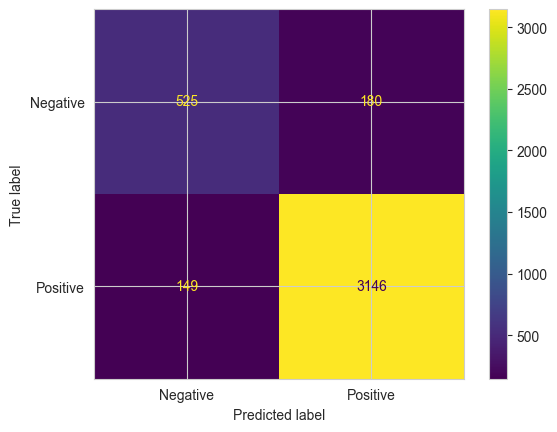

In [39]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rfc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

# KNN Classifier

In [40]:
# create a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
# Evaluate the classifier on the testing set
accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.84475


In [42]:
# Get the accuracy score of the model
print('The accuracy of the KNN Classifier is',round(accuracy_score(knn.predict(X_test), y_test)*100,2),'%')

The accuracy of the KNN Classifier is 84.47 %


In [43]:
# Create a classification report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.80      0.16      0.27       705
    Positive       0.85      0.99      0.91      3295

    accuracy                           0.84      4000
   macro avg       0.82      0.58      0.59      4000
weighted avg       0.84      0.84      0.80      4000



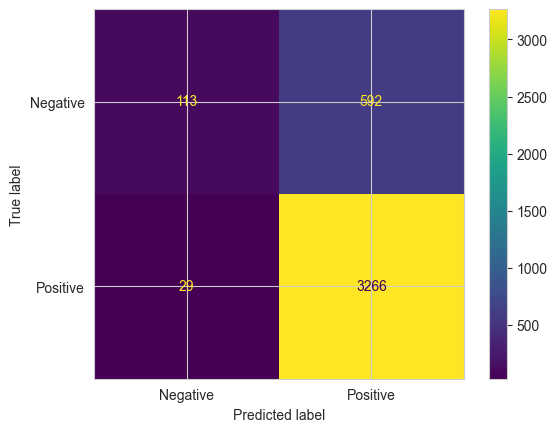

In [44]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

# Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8785


In [46]:
# Create a classification report
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.86      0.37      0.52       705
    Positive       0.88      0.99      0.93      3295

    accuracy                           0.88      4000
   macro avg       0.87      0.68      0.72      4000
weighted avg       0.88      0.88      0.86      4000



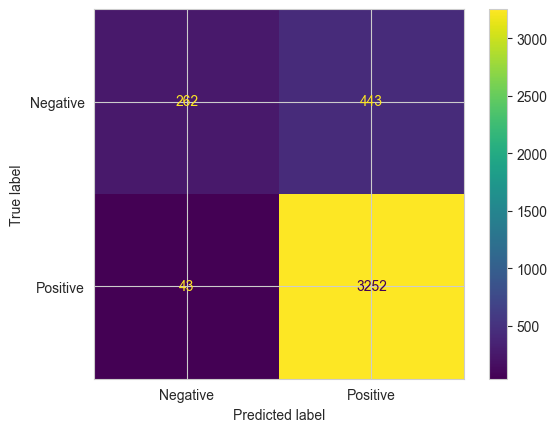

In [47]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, nb.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()